<a href="https://colab.research.google.com/github/Gary-713/Weight-and-Biases/blob/main/Weight_and_biases_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


In [2]:
pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [3]:
import wandb

In [4]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
# Initialize WandB
run = wandb.init(
    project="Phishing-Site-Regression",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    },
)

wandb: Currently logged in as: mbungogary713 (mbungogary713-usiu). Use `wandb login --relogin` to force relogin


In [6]:
data = pd.read_csv('/content/urlset.csv', encoding='latin1', on_bad_lines='skip')

<ipython-input-6-4d08721b94b7>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/urlset.csv', encoding='latin1', on_bad_lines='skip')


In [7]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [8]:
# Handle missing values
data = data.dropna()

In [9]:
# Convert categorical columns to numerical if necessary
data['domain'] = data['domain'].astype('category').cat.codes

<ipython-input-9-359e02f0c56b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['domain'] = data['domain'].astype('category').cat.codes


In [10]:
# Features and target variable
X = data.drop('label', axis=1)
y = data['label']

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model=LinearRegression()

In [13]:
model

LinearRegression()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
X_train_encoded = label_encoder.fit_transform(X_train['domain'])
y_train_encoded = label_encoder.fit_transform(y_train)

In [16]:
X_train['column_with_strings'] = X_train_encoded.astype(float)

In [17]:
X_train = X_train.drop('domain', axis=1)

In [18]:
X_train['domain_encoded'] = X_train_encoded

In [19]:
X_train_encoded = X_train_encoded.reshape(-1, 1)

In [20]:
model.fit(X_train_encoded,y_train_encoded)

LinearRegression()

In [21]:
model.coef_

array([-8.57317813e-06])

In [22]:
model.intercept_

0.7865265683435865

In [23]:
X_test_encoded = label_encoder.fit_transform(X_test['domain'])
y_test_encoded = label_encoder.fit_transform(y_test)

In [24]:
X_test = X_test.drop('domain', axis=1)

In [25]:
X_test['domain_encoded'] = X_test_encoded

In [26]:
X_test_encoded = X_test_encoded.reshape(-1, 1)

In [27]:
predicted = model.predict(X_test_encoded)

In [28]:
predicted

array([0.54217385, 0.70677887, 0.77307525, ..., 0.74277764, 0.70026325,
       0.68151371])

In [29]:
# Convert predictions to binary (phishing or not)
predicted_binary = [1 if pred >= 0.5 else 0 for pred in predicted]

In [30]:
predicted_binary

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [31]:
# Evaluate the model
mean_model = mean_squared_error(y_test, predicted)

In [32]:
accuracy_model = accuracy_score(y_test, predicted_binary)

In [33]:
print(f"Linear Regression Mean Squared Error: {mean_model}")

Linear Regression Mean Squared Error: 0.2576371318917421


In [34]:
print(f"Linear Regression Accuracy: {accuracy_model}")

Linear Regression Accuracy: 0.5011121151039133


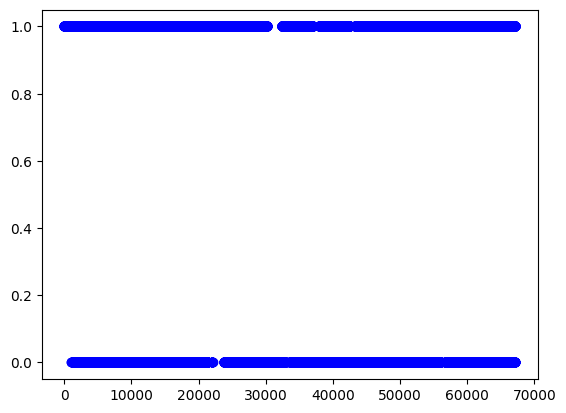

In [35]:
# Plot the training data
plt.scatter(X_train_encoded, y_train_encoded, color='blue', label='Training data')
plt.savefig("linear_regression_plot1.png")
wandb.log({"Linear Regression Plot": wandb.Image("linear_regression_plot1.png")})

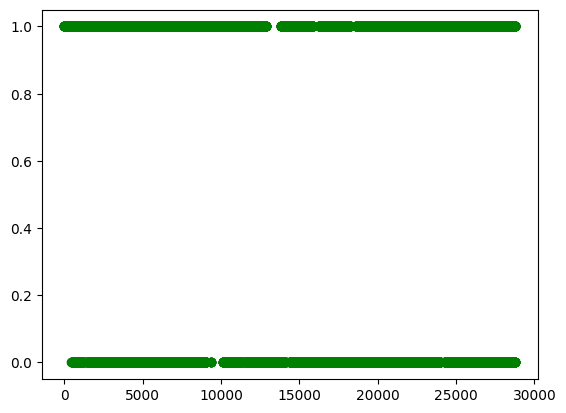

In [36]:
# Plot the test data
plt.scatter(X_test_encoded, y_test, color='green', label='Test data')
plt.savefig("linear_regression_plot2.png")
wandb.log({"Linear Regression Plot": wandb.Image("linear_regression_plot2.png")})

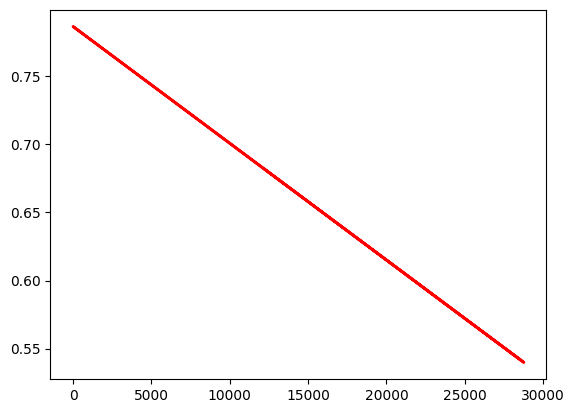

In [37]:
# Plot the regression line
plt.plot(X_test_encoded, predicted, color='red', linewidth=2, label='Regression line')
plt.savefig("linear_regression_plot3.png")
wandb.log({"Linear Regression Plot": wandb.Image("linear_regression_plot3.png")})

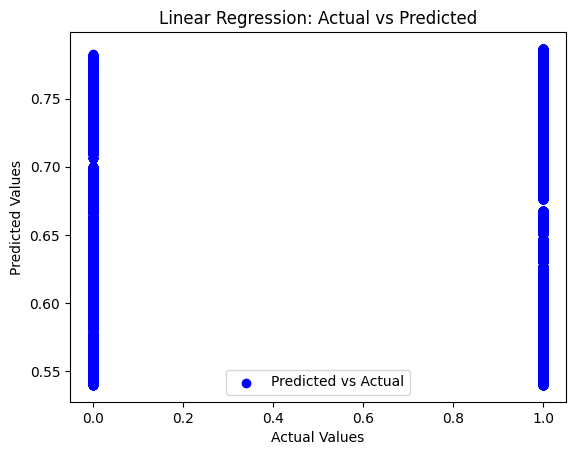

In [38]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, predicted, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

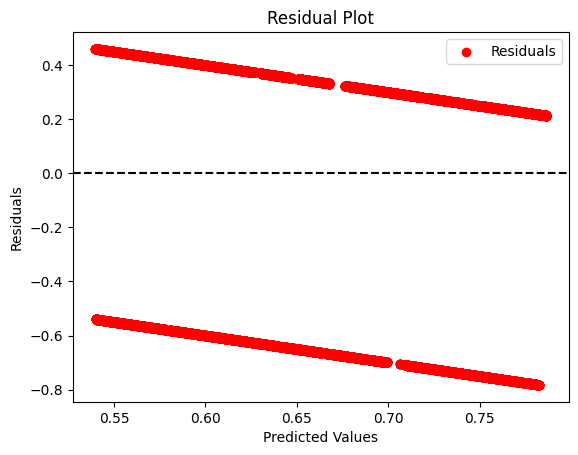

<Figure size 640x480 with 0 Axes>

In [39]:
# Plotting the residuals
residuals = y_test - predicted
plt.scatter(predicted, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()
plt.savefig("linear_regression_plot5.png")
wandb.log({"Linear Regression Plot": wandb.Image("linear_regression_plot5.png")})

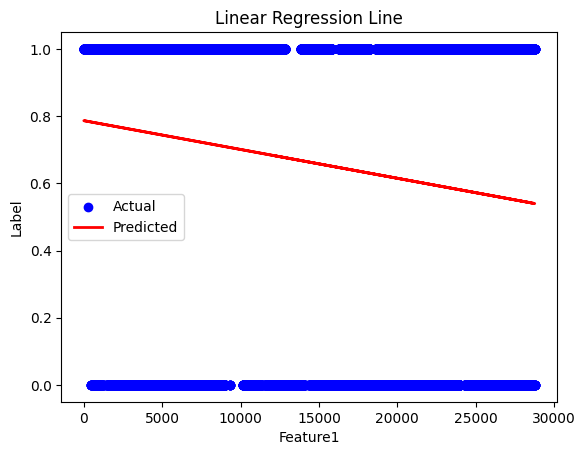

<Figure size 640x480 with 0 Axes>

In [40]:
# Plot the data and the regression line
plt.scatter(X_test_encoded, y_test, color='blue', label='Actual')
plt.plot(X_test_encoded, predicted, color='red', linewidth=2, label='Predicted')
plt.xlabel('Feature1')
plt.ylabel('Label')
plt.title('Linear Regression Line')
plt.legend()
plt.show()
plt.savefig("linear_regression_plot6.png")
wandb.log({"Linear Regression Plot": wandb.Image("linear_regression_plot6.png")})

In [41]:
# Log metrics to WandB
wandb.log({
    "Linear Regression MSE": mean_model,
    "Linear Regression Accuracy": accuracy_model,
})